# Анализ результатов опыта

Импортируем данные опытов в формате Excel

In [ ]:
import pandas as pd
import numpy as np
data = pd.read_excel('Высевающий диск.xlsx', sheet_name='not_calibration')
data.head()

,Диск,Повторность опыта,"Установленная частота, Гц",Скорость высевающего диска,"Число оборотов, 1/мин",Масса фактическая,Масса расчёт,"Коэффициент заполнения, %",м/с,км/ч
0,"2,2х96",I,10,0.1,10.051891,18.81,18.398982,102.233920,0.618578,2.226880
1,"2,2х96",II,10,0.1,10.051891,18.61,18.398982,101.146903,0.618578,2.226880
2,"2,2х96",III,10,0.1,10.051891,19.20,18.398982,104.353602,0.618578,2.226880
3,"2,2х96",I,20,0.2,20.103782,37.22,36.797963,101.146903,1.237156,4.453761
4,"2,2х96",II,20,0.2,20.103782,37.42,36.797963,101.690411,1.237156,4.453761


In [ ]:
data_pelleted = pd.read_excel('Высевающий диск.xlsx', sheet_name='pelleted')
data_pelleted.head()

,Диск,Повторность опыта,"Установленная частота, Гц",Скорость высевающего диска,"Число оборотов, 1/мин",Масса фактическая,Масса расчёт,"Коэффициент заполнения, %",м/с,км/ч
0,"2,2х96",I,10,0.1,10.051891,28.8,28.370458,101.514048,0.618578,2.226880
1,"2,2х96",II,10,0.1,10.051891,29.2,28.370458,102.923966,0.618578,2.226880
2,"2,2х96",III,10,0.1,10.051891,28.6,28.370458,100.809090,0.618578,2.226880
3,"2,2х96",I,20,0.2,20.103782,58.2,56.740915,102.571486,1.237156,4.453761
4,"2,2х96",II,20,0.2,20.103782,58.4,56.740915,102.923966,1.237156,4.453761


Первая таблица содержит данные по опыту с некалиброванными семенами, вторая - с дражированными.
Просмотрим данные по таблице

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Диск                        54 non-null     object 
 1   Повторность опыта           54 non-null     object 
 2   Установленная частота, Гц   54 non-null     int64  
 3   Скорость высевающего диска  54 non-null     float64
 4   Число оборотов, 1/мин       54 non-null     float64
 5   Масса фактическая           54 non-null     float64
 6   Масса расчёт                54 non-null     float64
 7   Коэффициент заполнения, %   54 non-null     float64
 8   м/с                         54 non-null     float64
 9   км/ч                        54 non-null     float64
dtypes: float64(7), int64(1), object(2)
memory usage: 4.3+ KB


Для упрощения процесса программирования заменим названия столбцов на латинские

In [ ]:
data.set_axis(['disk', 'repeat', 'frequency', 'disk_speed', 'number_disk', 'mass_actual', 'mass_calc', 'fill_factor', 'speed_ms', 'speed_kmh'], axis='columns', inplace=True)
data.head()

,disk,repeat,frequency,disk_speed,number_disk,mass_actual,mass_calc,fill_factor,speed_ms,speed_kmh
0,"2,2х96",I,10,0.1,10.051891,18.81,18.398982,102.233920,0.618578,2.226880
1,"2,2х96",II,10,0.1,10.051891,18.61,18.398982,101.146903,0.618578,2.226880
2,"2,2х96",III,10,0.1,10.051891,19.20,18.398982,104.353602,0.618578,2.226880
3,"2,2х96",I,20,0.2,20.103782,37.22,36.797963,101.146903,1.237156,4.453761
4,"2,2х96",II,20,0.2,20.103782,37.42,36.797963,101.690411,1.237156,4.453761


In [ ]:
data_pelleted.set_axis(['disk', 'repeat', 'frequency', 'disk_speed', 'number_disk', 'mass_actual', 'mass_calc', 'fill_factor', 'speed_ms', 'speed_kmh'], axis='columns', inplace=True)
data_pelleted.head()

,disk,repeat,frequency,disk_speed,number_disk,mass_actual,mass_calc,fill_factor,speed_ms,speed_kmh
0,"2,2х96",I,10,0.1,10.051891,28.8,28.370458,101.514048,0.618578,2.226880
1,"2,2х96",II,10,0.1,10.051891,29.2,28.370458,102.923966,0.618578,2.226880
2,"2,2х96",III,10,0.1,10.051891,28.6,28.370458,100.809090,0.618578,2.226880
3,"2,2х96",I,20,0.2,20.103782,58.2,56.740915,102.571486,1.237156,4.453761
4,"2,2х96",II,20,0.2,20.103782,58.4,56.740915,102.923966,1.237156,4.453761


Проведём подсчёт средних значений в таблицах

In [ ]:
def meaner(data):
    data_mean=data[data['repeat']=='I'].reset_index(drop=True)
    data_mean['repeat'] = data_mean['repeat'].replace('I', 'mean')
    i = 0
    for dt in range(len(data_mean)):
        mass_count = 0
        factor_count = 0
        for il in range(3):
            mass_count += data.loc[il+i, 'mass_actual']
            factor_count += data.loc[il+i, 'fill_factor']
        mass_count/=3
        factor_count/=3
        i+=3
        data_mean.loc[dt, 'mass_actual'] = mass_count
        data_mean.loc[dt, 'fill_factor'] = factor_count
    return data_mean

data_pelleted_mean = meaner(data_pelleted)
data_pelleted_mean

,disk,repeat,frequency,disk_speed,number_disk,mass_actual,mass_calc,fill_factor,speed_ms,speed_kmh
0,"2,2х96",mean,10,0.1,10.051891,28.866667,28.370458,101.749035,0.618578,2.226880
1,"2,2х96",mean,20,0.2,20.103782,58.666667,56.740915,103.393938,1.237156,4.453761
2,"2,2х96",mean,30,0.3,30.155673,86.533333,85.111373,101.670706,1.855734,6.680641
3,"2,2х96",mean,40,0.4,40.207565,115.733333,113.481830,101.984021,2.474312,8.907522
4,"2,2х96",mean,50,0.5,50.259456,145.333333,141.852288,102.453993,3.092890,11.134402
5,"2,2х96",mean,60,0.6,60.311347,171.600000,170.222745,100.809090,3.711467,13.361283
6,"2,2х48",mean,10,0.1,10.051891,14.066667,14.185229,99.164186,0.618578,2.226880
7,"2,2х48",mean,20,0.2,20.103782,28.600000,28.370458,100.809090,1.237156,4.453761
8,"2,2х48",mean,30,0.3,30.155673,42.800000,42.555686,100.574103,1.855734,6.680641
9,"2,2х48",mean,40,0.4,40.207565,57.466667,56.740915,101.279062,2.474312,8.907522


In [ ]:
data_mean = meaner(data)
data_mean

,disk,repeat,frequency,disk_speed,number_disk,mass_actual,mass_calc,fill_factor,speed_ms,speed_kmh
0,"2,2х96",mean,10,0.1,10.051891,18.873333,18.398982,102.578142,0.618578,2.226880
1,"2,2х96",mean,20,0.2,20.103782,37.286667,36.797963,101.328072,1.237156,4.453761
2,"2,2х96",mean,30,0.3,30.155673,54.916667,55.196945,99.492222,1.855734,6.680641
3,"2,2х96",mean,40,0.4,40.207565,72.086667,73.595926,97.949262,2.474312,8.907522
4,"2,2х96",mean,50,0.5,50.259456,85.800000,91.994908,93.266032,3.092890,11.134402
5,"2,2х96",mean,60,0.6,60.311347,98.926667,110.393889,89.612448,3.711467,13.361283
6,"2,2х48",mean,10,0.1,10.051891,9.336667,9.199491,101.491125,0.618578,2.226880
7,"2,2х48",mean,20,0.2,20.103782,18.283333,18.398982,99.371442,1.237156,4.453761
8,"2,2х48",mean,30,0.3,30.155673,26.966667,27.598472,97.710722,1.855734,6.680641
9,"2,2х48",mean,40,0.4,40.207565,35.260000,36.797963,95.820521,2.474312,8.907522


Создадим сводную таблицу по дискам

In [ ]:
data_pivot_mean = data_mean.pivot_table(index=['disk'], columns='disk_speed', values='fill_factor', aggfunc='sum')
data_pivot_mean

disk_speed,0.1,0.2,0.3,0.4,0.5,0.6
disk,,,,,,
"2,2х48",101.491125,99.371442,97.710722,95.820521,93.403721,87.661857
"2,2х96",102.578142,101.328072,99.492222,97.949262,93.266032,89.612448
"2,5х18",101.165020,101.309955,100.939565,96.043963,93.125928,92.742653


Сводная таблица по повторностям

In [ ]:
data_pivot_no = data.pivot_table(index=['disk', 'repeat'], columns='disk_speed', values='fill_factor', aggfunc='sum')
data_pivot_no

disk_speed            0.1         0.2         0.3        0.4        0.5  \
disk   repeat                                                             
2,2х48 I       104.353602   99.027220   96.527082  96.364029  92.831225   
       II       97.940204  101.146903   96.527082  95.820521  94.548712   
       III     102.179569   97.940204  100.078003  95.277013  92.831225   
2,2х96 I       102.233920  101.146903   98.664881  96.880362  94.331308   
       II      101.146903  101.690411   99.733781  98.755466  93.907372   
       III     104.353602  101.146903  100.078003  98.211958  91.559416   
2,5х18 I        99.425793  105.078280  100.295406  96.527082  89.744098   
       II      101.744762   99.425793  100.295406  92.251483  93.106603   
       III     102.324504   99.425793  102.227881  99.353325  96.527082   

disk_speed           0.6  
disk   repeat             
2,2х48 I       87.305557  
       II      86.598996  
       III     89.081018  
2,2х96 I       89.615468  
       II      90.140859  
       III     89.081018  
2,5х18 I       92.758757  
       II      91.792520  
       III     93.676683

Создадим массив усреднённых данных по сводным таблицам

In [ ]:
def pivot_mean(pivot):
    data_sc = pd.DataFrame(pivot.to_records()).rename(columns={'disk':'disc'})
    data_sc.set_axis([0, 1, 2, 3, 4, 5, 6], axis='columns', inplace=True)
    math = []
    i=1
    for dt in data_sc:
        mean = 0
        for dat in data_sc[i]:
            mean += dat
        math.append(mean/3)
        i+=1
        if i>6: break
    Ser = pd.Series(math, [0.1, 0.2, 0.3, 0.4, 0.5, 0.6])
    return Ser

math = pivot_mean(data_pivot_mean)
math

0.1    101.744762
0.2    100.669823
0.3     99.380836
0.4     96.604582
0.5     93.265227
0.6     90.005653
dtype: float64

Построим график зависимости коэффициента заполняемости (в %) от окружной скорости диска.

In [ ]:
import matplotlib.pyplot as plt

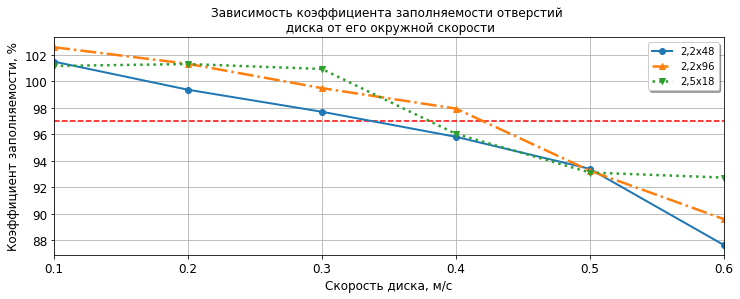

In [ ]:
def graph_data(data_mean):
    fig, ax = plt.subplots()
    data_mean_pivot = data_mean.pivot_table(index=['disk_speed'], columns='disk', values='fill_factor', aggfunc='sum')
    data_mean_pivot['2,2х48'].plot(linewidth = 2, marker='o', linestyle = '-')
    data_mean_pivot['2,2х96'].plot(linewidth = 2.5, marker='^', linestyle = '-.')
    data_mean_pivot['2,5х18'].plot(linewidth = 2.5, marker='v', linestyle = ':', grid=True, figsize=(12, 4), fontsize=12)
    ax.hlines(97, 0.1, 0.6, color = 'r', linewidth = 1.5, linestyle = '--')
    ax.legend(['2,2х48', '2,2х96', '2,5х18'], shadow=True)
    plt.title('Зависимость коэффициента заполняемости отверстий \n диска от его окружной скорости', fontsize=12)
    plt.xlabel('Скорость диска, м/с', fontsize=12)
    plt.ylabel('Коэффициент заполняемости, %', fontsize=12)
    plt.xlim(0.1, 0.6)



""""
ax.annotate('2,5х18', (0.33, 99.5),
            xytext=(0.69, 0.96), textcoords='axes fraction',
            arrowprops=dict(linewidth = 0, facecolor='black', shrink=0.03),
            fontsize=22,
            horizontalalignment='right', verticalalignment='top')
ax.annotate('2,2х96', (0.4, 98),
            xytext=(0.79, 0.9), textcoords='axes fraction',
            arrowprops=dict(linewidth = 0, facecolor='black', shrink=0.03),
            fontsize=22,
            horizontalalignment='right', verticalalignment='top')
ax.annotate('2,2х48', (0.3, 98),
            xytext=(0.3, 0.4), textcoords='axes fraction',
            arrowprops=dict(linewidth = 0, facecolor='black', shrink=0.03),
            fontsize=22,
            horizontalalignment='right', verticalalignment='top')
            """

graph_data(data_mean)
plt.show()

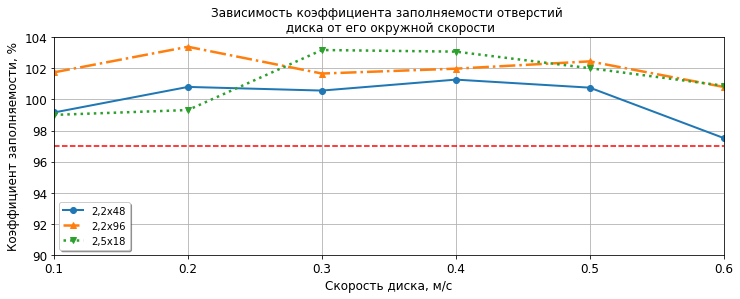

In [ ]:

"""
(data_pelleted_mean
                 .pivot_table(index=['disk_speed'], columns='disk', values='fill_factor', aggfunc='sum')
                 .plot(grid=True, figsize=(12, 5))
);
plt.hlines(97, 0.1, 0.6, color = 'r', linestyle = '--')
plt.title('Зависимость коэффициента заполняемости отверстий \n диска от его окружной скорости')
plt.xlabel('Скорость диска, м/с')
plt.ylabel('Коэффициент заполняемости, %')
plt.xlim(0.1, 0.6)
plt.ylim(90, 104)
plt.show()
"""

graph_data(data_pelleted_mean)
plt.ylim(90, 104)
plt.show()

Анализ графика показывает, что график коэффициента заполнения при эксперименте имеет линейную тенденцию к снижению, при повышении окружной скорости диска.

# Расчёт количества семян, высеваемых диском

Создадим Data Frame с данными по типоразмерам диска, его окружной скорости, частоты вращения и массу семян, высеваемых за время опыта. Дополнительно добавим к таблице отдельный столбец с количеством семян в диске. Зная диаметр, на котором расположены отверстия на диске вычислим шаг ячеек. Затем рассчитаем, сколько семян высевается в секунду теоретически и практически. Применим расчёт коэффициента заполняемости с помощью данной методики.

In [ ]:
import math
def cell_disc(motion_disk):
    mass = []
    for disc in motion_disk['disk']:
        if disc == '2,2х96': num = 96
        if disc == '2,2х48': num = 48
        if disc == '2,5х18': num = 18
        mass.append(num)
    return mass
d_disk = 0.19 #диаметр диска
mass_thousand = 19.07 #масса тысячи семян
time_exp = 60 #время эксперимента, с
motion_disk = pd.DataFrame(data_mean.loc[:, ['disk', 'frequency', 'disk_speed', 'mass_actual']]).reset_index(drop=True)
motion_disk['cell_count'] = cell_disc(motion_disk) #количество отверстий в диске
motion_disk['cell_step'] = math.pi*d_disk/motion_disk['cell_count'] #шаг ячеек
motion_disk['seed_sec_calc'] = motion_disk['disk_speed']/motion_disk['cell_step'] #сколько семян падает в секунду теоретически
motion_disk['seed_sec_actual'] = motion_disk['mass_actual']*1000/mass_thousand/time_exp #сколько семян падает в секунду практически
motion_disk['fill_factor_cell'] = motion_disk['seed_sec_actual']/motion_disk['seed_sec_calc']*100
motion_disk.head()

,disk,frequency,disk_speed,mass_actual,cell_count,cell_step,seed_sec_calc,seed_sec_actual,fill_factor_cell
0,"2,2х96",10,0.1,18.873333,96,0.006218,16.083026,16.494785,102.560211
1,"2,2х96",20,0.2,37.286667,96,0.006218,32.166052,32.587543,101.310361
2,"2,2х96",30,0.3,54.916667,96,0.006218,48.249077,47.995688,99.474831
3,"2,2х96",40,0.4,72.086667,96,0.006218,64.332103,63.001806,97.932141
4,"2,2х96",50,0.5,85.800000,96,0.006218,80.415129,74.986890,93.249730


Теперь представим визуализацию наших расчётов в данной таблице в виде графиков.

(0.1, 0.6)

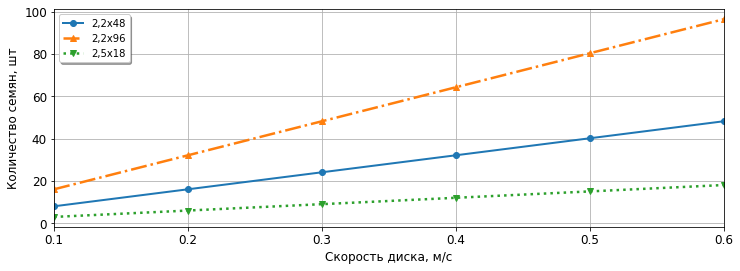

In [ ]:
#график зависимости количества высеваемых семян диском за секунду теоретически от скорости диска
""""
(motion_disk
                 .pivot_table(index=['disk_speed'], columns='disk', values='seed_sec_calc', aggfunc='sum')
                 .plot(grid=True, figsize=(12, 5))
);
"""
#fig, ax = plt.subplots()
motion_disk_pivot = motion_disk.pivot_table(index=['disk_speed'], columns='disk', values='seed_sec_calc', aggfunc='sum')
motion_disk_pivot['2,2х48'].plot(linewidth = 2, marker='o', linestyle = '-')
motion_disk_pivot['2,2х96'].plot(linewidth = 2.5, marker='^', linestyle = '-.')
motion_disk_pivot['2,5х18'].plot(linewidth = 2.5, marker='v', linestyle = ':', grid=True, figsize=(12, 4), fontsize=12)

plt.legend(['2,2х48', '2,2х96', '2,5х18'], shadow=True)

plt.xlabel('Скорость диска, м/с', fontsize=12)
plt.ylabel('Количество семян, шт', fontsize=12)
plt.xlim(0.1, 0.6)
#graph_data(motion_disk)
#plt.xlabel('Скорость диска, м/с')
#plt.ylabel('Количество семян, шт')
#plt.show()

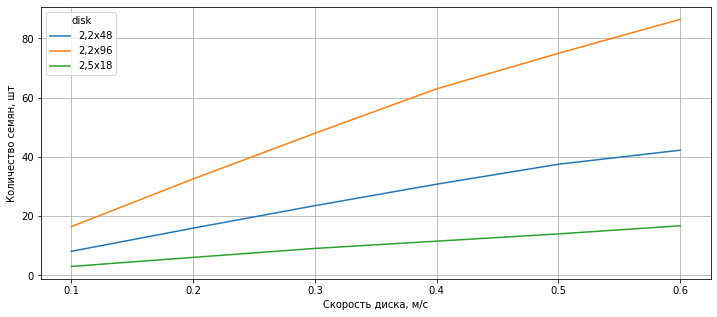

In [ ]:
#график зависимости количества высеваемых семян диском за секунду экспериментально от скорости диска
(motion_disk
                 .pivot_table(index=['disk_speed'], columns='disk', values='seed_sec_actual', aggfunc='sum')
                 .plot(grid=True, figsize=(12, 5))
);
plt.xlabel('Скорость диска, м/с')
plt.ylabel('Количество семян, шт')
plt.show()

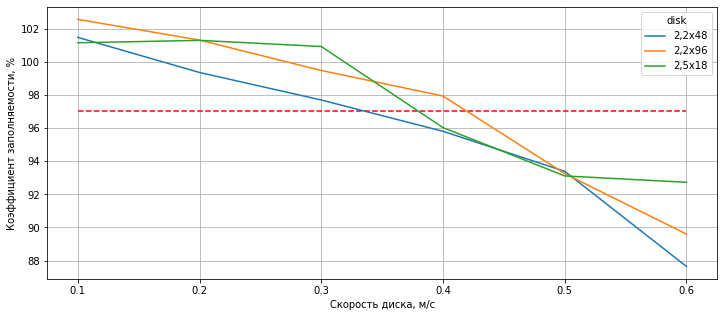

In [ ]:
#график зависимости коэффициента заполняемости от скорости диска
(motion_disk
                 .pivot_table(index=['disk_speed'], columns='disk', values='fill_factor_cell', aggfunc='sum')
                 .plot(grid=True, figsize=(12, 5))
);
plt.hlines(97, 0.1, 0.6, color = 'r', linestyle = '--')
plt.xlabel('Скорость диска, м/с')
plt.ylabel('Коэффициент заполняемости, %')
plt.show()

Анализ полученных графиков показывает, что зависимость количества высеваемых семян диском за секунду от скорости диска растёт линейно на каждом из типоразмеров диска. Данная гипотеза подтверждается экспериментально на втором графике. Коэффициент заполняемости, рассчитанный по количеству выпадаемых семян коррелирует с коэффициентом заполняемости, рассчитанным по массе, что подтверждает истинность данных рассчётов.

По полученным лабораторным данным можно сделать вывод, что с целью посева семян сахарной свёклы на семена подходит высевающий диск 2,2х48, т.к. при скорости вращения диска в пределах 0,25...0,35 м/с, соответствующей скорости сеялки 5...8 км/ч, соблюдается коэффициент заполняемости выше 97% и теоретическая норма высева находится в пределах 20...30 шт./м.

# Аппроксимация данных

Зависимость коэффициента заполняемости от скорости диска, судя по анализу рисунка, имеет некую тенденцию. Для подтверждения данной гипотезы проведём апроксимирование экспериментальных данных, полученных при высеве некалиброванных семян сахарной свёклы.

Импортируем необходимые нам для визуализации библиотеки.

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

In [ ]:
def approx(x_data, y_data):      #функция аппроксимации
    #размеры и свойства графика
    plt.figure(figsize=(12,5))
    plt.grid()

    # необработанные данные
    #x_data = data['disk_speed']
    #y_data = data['fill_factor']
    plt.plot(x_data, y_data, 'o', mec='none')

    #подгонка и наложение полинома 2-го порядка
    params_data = np.polyfit(x_data, y_data, 2)
    xp_data = np.linspace(x_data.min(), 2, 30)
    yp_data = np.polyval(params_data, xp_data)
    plt.plot(xp_data, yp_data, color = 'k', linewidth = 2,)

    #построим линию в диапазоне ошибок
    sig_data = np.std(y_data - np.polyval(params_data, x_data))
    plt.fill_between(xp_data, yp_data - sig_data,
                     yp_data + sig_data, color='g', alpha=0.1)

    plt.xlabel("Скорость высевающего диска, м/с")
    plt.ylabel("Коэффициент заполняемости, %")
    plt.hlines(97, xp_data.min(), xp_data.max(), color = 'r', linestyle = '--')

    plt.xlim(0.09, 0.8)
    plt.ylim(85, 105)
    plt.show()
    return xp_data, yp_data, sig_data

In [ ]:
def polinomer(xp_data, yp_data, sig_data):    #построение полинома 2-го порядка
    yn_data = yp_data + yp_data*0.0001

    def func(x, a, b, c):
        return a*x**2 + b*x + c

    popt, pcov = curve_fit(func, xp_data, yn_data, sigma = 0.0001*yp_data)

    fig = plt.figure(figsize=(12,5))
    ax = fig.add_subplot(111)
    ax.errorbar(xp_data, yn_data, yerr = sig_data, color = 'k', fmt = 'D')
    ax.plot(xp_data, np.polyval(popt, xp_data), color = 'b', linestyle = '-')
    ax.text(0.2, 95, r"a = {0:.3f} +/- {1:.3f}".format(popt[0], pcov[0,0]**0.5))
    ax.text(0.2, 93, r"b = {0:.3f} +/- {1:.3f}".format(popt[1], pcov[1,1]**0.5))
    ax.text(0.2, 91, r"c = {0:.3f} +/- {1:.3f}".format(popt[2], pcov[2,2]**0.5))
    ax.grid()
    plt.xlabel("Скорость высевающего диска, м/с")
    plt.ylabel("Коэффициент заполняемости, %")
    plt.hlines(97, xp_data.min(), xp_data.max(), color = 'r', linestyle = '--')
    plt.xlim(0.09, 0.8)
    plt.ylim(85, 105)
    plt.show()

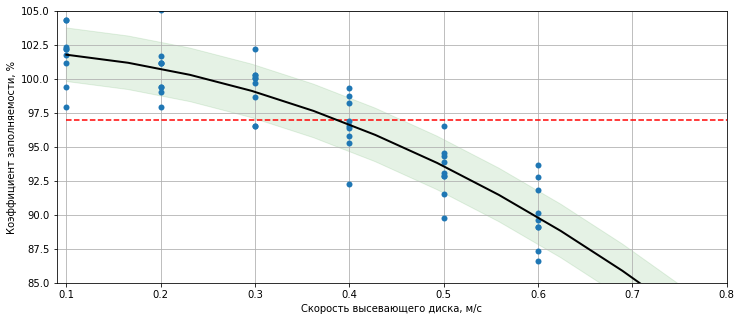

In [ ]:
xp_data, yp_data, sig_data = approx(data['disk_speed'], data['fill_factor'])

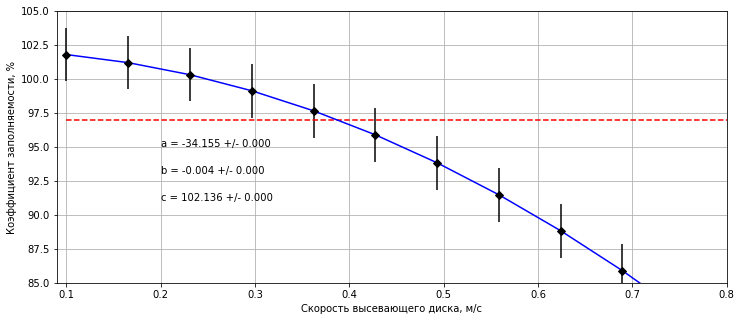

In [ ]:
polinomer(xp_data, yp_data, sig_data)

Аппроксимация данных, полученных при эксперименте с высевом дражированных семян.

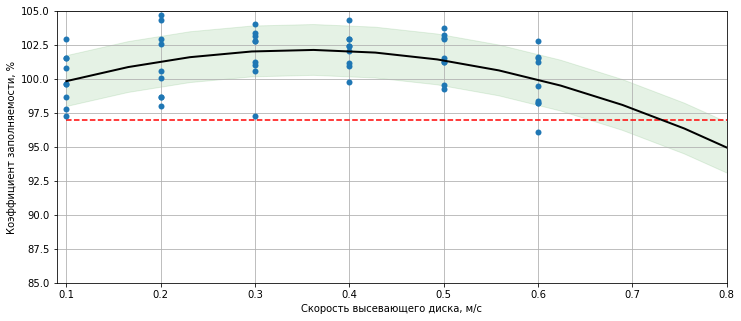

In [ ]:
xp_pelleted, yp_pelleted, sig_pelleted = approx(data_pelleted['disk_speed'], data_pelleted['fill_factor'])

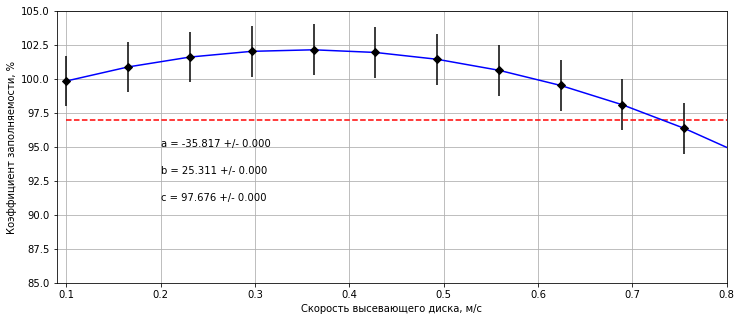

In [ ]:
polinomer(xp_pelleted, yp_pelleted, sig_pelleted)

После аппроксимации экспериментальных данных можно сделать вывод, что зависимость коэффициента заполняемости от скорости высевающего аппарата является полиномом 2-го порядка. Коэффициенты для полиномы представлены на графиках функции polinomer()